## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94773248/94765736 [==============================] - 52s 1us/step


In [4]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [8]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [11]:
  # useful for getting number of output classes
folders = glob('Datasets/Datasets/train/*')

In [12]:
folders

['Datasets/Datasets/train\\audi',
 'Datasets/Datasets/train\\lamborghini',
 'Datasets/Datasets/train\\mercedes']

In [13]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [15]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [17]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [20]:
test_set = test_datagen.flow_from_directory('Datasets/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [21]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\rakes\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 24s 13s/step - loss: 8.5973 - accuracy: 0.3281 - val_loss: 4.4943 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 15s 11s/step - loss: 5.0028 - accuracy: 0.3906 - val_loss: 8.7328 - val_accuracy: 0.1724
Epoch 3/50
2/2 [==============================] - 15s 11s/step - loss: 5.5043 - accuracy: 0.4219 - val_loss: 10.4970 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 17s 12s/step - loss: 6.0010 - accuracy: 0.4531 - val_loss: 7.2271 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 17s 12s/step - loss: 3.5659 - accuracy: 0.4688 - val_loss: 1.1306 - val_accuracy: 0.4655
Epoch 6/50
2/2 [==============================] - 19s 13s/step - loss: 2.0464 - accuracy: 0.5000 - val_loss: 3.3870 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 20s 15s/step - loss: 3.3128 - accuracy: 0.3906 - val_loss: 1.0163 - val_accuracy: 0.4483
Epoch 8/50
2/2 [==========

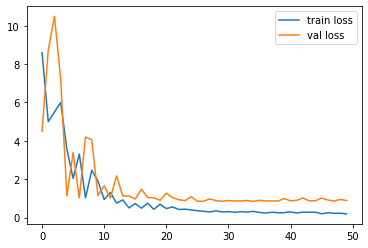

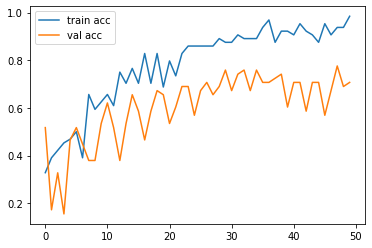

<Figure size 432x288 with 0 Axes>

In [22]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

C:\Users\rakes\anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [24]:

y_pred = model.predict(test_set)


In [25]:
y_pred

array([[2.76330020e-02, 7.62884915e-01, 2.09482074e-01],
       [1.03166580e-01, 8.66190076e-01, 3.06433793e-02],
       [1.16062298e-01, 4.07462507e-01, 4.76475149e-01],
       [7.12228484e-06, 7.40773510e-04, 9.99252141e-01],
       [4.97383848e-02, 2.57046573e-04, 9.50004578e-01],
       [8.16101767e-03, 9.90370572e-01, 1.46850268e-03],
       [2.54886076e-02, 5.75944245e-01, 3.98567170e-01],
       [7.49319838e-03, 9.23959911e-01, 6.85468167e-02],
       [4.16078977e-02, 2.54090339e-01, 7.04301834e-01],
       [3.28717008e-02, 2.16254622e-01, 7.50873744e-01],
       [9.82132703e-02, 1.11956419e-02, 8.90591145e-01],
       [4.79391403e-02, 4.59403038e-01, 4.92657840e-01],
       [5.56383170e-02, 1.01082966e-01, 8.43278766e-01],
       [1.88013300e-01, 5.24542689e-01, 2.87444025e-01],
       [1.41207159e-01, 2.21732557e-01, 6.37060225e-01],
       [7.22481012e-01, 2.10227594e-01, 6.72913343e-02],
       [1.04967551e-02, 1.46157652e-01, 8.43345523e-01],
       [3.73948038e-01, 2.92201

In [26]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [27]:
y_pred

array([1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 0, 2, 2, 1, 1, 2, 2, 2, 1, 2,
       1, 1, 1, 0, 0, 1, 1, 0, 2, 2, 0, 0, 1, 1], dtype=int64)

In [28]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [29]:
model=load_model('model_resnet50.h5')

In [30]:
img_data

NameError: name 'img_data' is not defined

In [31]:
img=image.load_img('Datasets/Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [32]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [33]:
x.shape

(224, 224, 3)

In [34]:
x=x/255

In [35]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [36]:
model.predict(img_data)

array([[0.01688973, 0.00575098, 0.97735924]], dtype=float32)

In [39]:
a=np.argmax(model.predict(img_data), axis=1)
a

array([2], dtype=int64)

In [38]:
a==1

array([False])